# A [Jupyter](https://jupyter.org/) Kernel for [PowerShell](https://github.com/PowerShell/PowerShell)

This kernel is being written in C#, and in the process, I've taken some messaging code from the [iCSharp kernel](https://github.com/zabirauf/icsharp) and made a generic Jupyter Kernel base library for .Net, with a re-usable core for anyone who needs to create [Jupyter](https://jupyter.org/) kernels in .Net languages! 

Feel free to use just that Jupyter library, if you like (it will be on NuGet eventually). It is under the Apache license.

## Install

I am finally doing a preliminary release with a `chocolateyInstall` script. You should be able to download from the releases link (or call `choco install Jupyter-PowerShell`) ... 

## Current Status

For the time being, I've removed support for using Windows PowerShell as the kernel -- the Windows PowerShell host was much easier, but was never the end goal, and it was getting in the way of making a cross-platform PowerShell Core implementation.

### PowerShell Core

In order to get cross-platform support, the current kernel is based on [PowerShell Core](https://github.com/PowerShell/PowerShell). As a result, to build it yourself you need [dotnet core 2](https://www.microsoft.com/net/core). 

You can build it by running `dotnet restore; dotnet build` from the root. If you want to build it in Visual Studio, you need VS 2017 version 15.3 or higher.

### OS Support

In theory, I have a working build that should run in Windows, Linux, or MacOS X -- however, I haven't had time to test it outside Windows yet.

### Functionality

So far, I am only handling two messages:
* KernelInfo request
* Execute request

However, those are the two key requirements, so the PowerShell kernel is _working_, and returning text output _and errors_ as it does on the console (see examples below).  However, only basic PowerShell stuff works, so far. There's no interactive widgets yet, and interactive cmdlets (e.g.: `Read-Host` and `Get-Credential`) **will fail**.

#### Extras:

* There is a `Write-Jupyter` command which allows you to customize output by specifying the mime type.
* There's a config option (in `PowerShell-Kernel.Config.json`) to turn on debug output and even break into a debugger on startup (so you can attach Visual Studio)

In [2]:
$PSVersionTable

Name                           Value                                                                                    
----                           -----                                                                                    
PSVersion                      6.0.0                                                                                    
PSEdition                      Core                                                                                     
GitCommitId                    v6.0.0                                                                                   
OS                             Microsoft Windows 10.0.15063                                                             
Platform                       Win32NT                                                                                  
PSCompatibleVersions           {1.0, 2.0, 3.0, 4.0...}                                                                  
PSRemotingProtocolVersion      2

In [3]:
$Files = Get-ChildItem -File

### Currently there's no indicator for no output.

The IPython shell returns `null` when there's no output so you can see _something_, but I'm not sure I see value in that yet.

All commands are run in an ongoing session like a regular shell, so you can run multiple commands to capture, transform and output.

That means you can use this to do exploration and investigations, teaching, and literate DevOps...

In [4]:
$Files | Sort LastWriteTime -Descending

Directory: C:\Users\joel.bennett\Projects\Jupyter\Jupyter-PowerShell


Mode                LastWriteTime         Length Name                                                                   
----                -------------         ------ ----                                                                   
-a----       06/03/2018     02:02         162942 ReadMe.ipynb                                                           
-a----       06/03/2018     01:37          14923 Untitled.ipynb                                                         
-a----       05/03/2018     19:00           2344 build.ps1                                                              
-a----       03/03/2018     21:40           2302 ReadMe.md                                                              
-a----       20/02/2018     01:44           4682 jupyter-powershell.nuspec                                              
-a----       05/08/2017     01:00          12114 nteract - plotly.ipynb           

### Write-Jupyter

With the `Write-Jupyter` command, you can output HTML or Markdown, even using PowerShell's built-in ConvertTo-Html. You can either specify the Mimetype and pass in a string (or byte array for image types) like this:

In [5]:
($Files | ConvertTo-Html Mode, LastWriteTime, Name, Length -Fragment) -Join "" | Write-Jupyter -MimeType html

Mode,LastWriteTime,Name,Length
-a----,16/06/2017 23:57:44,.gitattributes,2581
-a----,28/06/2017 01:04:02,.gitignore,4597
-a----,05/03/2018 19:00:04,build.ps1,2344
-a----,20/02/2018 01:44:42,jupyter-powershell.nuspec,4682
-a----,03/08/2017 23:19:48,Jupyter-PowerShell.sln,2063
-a----,26/06/2017 13:54:10,kernel.json,289
-a----,24/06/2017 03:07:28,LICENSE.md,1140
-a----,05/08/2017 01:00:30,nteract - plotly.ipynb,12114
-a----,13/07/2017 22:49:28,nuget.config,411
-a----,02/08/2017 23:51:44,PowerShell.ico,55244


Or you can create an object with the mimetype as the property name, and the content as the value:

In [6]:
@{ "html" = $Files | ConvertTo-Html Mode, LastWriteTime, Name, Length } | Write-Jupyter

Mode,LastWriteTime,Name,Length
-a----,16/06/2017 23:57:44,.gitattributes,2581
-a----,28/06/2017 01:04:02,.gitignore,4597
-a----,05/03/2018 19:00:04,build.ps1,2344
-a----,20/02/2018 01:44:42,jupyter-powershell.nuspec,4682
-a----,03/08/2017 23:19:48,Jupyter-PowerShell.sln,2063
-a----,26/06/2017 13:54:10,kernel.json,289
-a----,24/06/2017 03:07:28,LICENSE.md,1140
-a----,05/08/2017 01:00:30,nteract - plotly.ipynb,12114
-a----,13/07/2017 22:49:28,nuget.config,411
-a----,02/08/2017 23:51:44,PowerShell.ico,55244


You can embed images into markdown by just dragging them onto the box. It'll create an attachment which will render as a data block, like this: 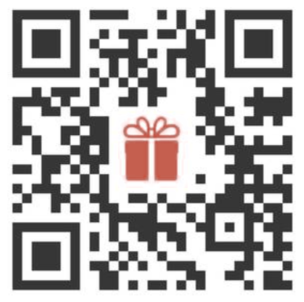

You can also specify them by linking to them with HTML code, or outputting the bytes from a script command as in the following examples:

In [7]:
$imageUrl = 'https://upload.wikimedia.org/wikipedia/commons/2/2f/PowerShell_5.0_icon.png'
@{ "html" = "<img src='$imageUrl' width='128' />" } | Write-Jupyter

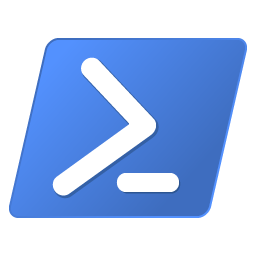

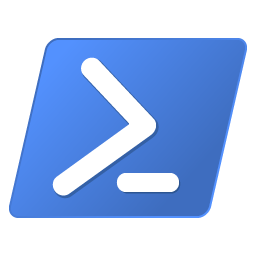

Name                           Value                                                                                    
----                           -----                                                                                    
png                            {137, 80, 78, 71...}

In [8]:
$ImageData = @{ "png" = (Invoke-WebRequest $imageUrl -UseBasicParsing).RawContentStream.GetBuffer() }
$ImageData

Write-Jupyter -InputObject $ImageData -Metadata @{ "image/png" = @{ 'width' = 32 } }
Write-Jupyter -InputObject $ImageData -Metadata @{ "image/png" = @{ 'width' = 64 } }

In [9]:
# You can add rendering properties to objects: text, html, markdown, latex, json, javascript, png, jpeg, svg ...
$Files | Add-Member ScriptProperty html {$this | ConvertTo-Html Mode, LastWriteTime, Name, Length -Fragment } -Force
$Files | Write-Jupyter

Mode,LastWriteTime,Name,Length
-a----,16/06/2017 23:57:44,.gitattributes,2581


Mode,LastWriteTime,Name,Length
-a----,28/06/2017 01:04:02,.gitignore,4597


Mode,LastWriteTime,Name,Length
-a----,05/03/2018 19:00:04,build.ps1,2344


Mode,LastWriteTime,Name,Length
-a----,20/02/2018 01:44:42,jupyter-powershell.nuspec,4682


Mode,LastWriteTime,Name,Length
-a----,03/08/2017 23:19:48,Jupyter-PowerShell.sln,2063


Mode,LastWriteTime,Name,Length
-a----,26/06/2017 13:54:10,kernel.json,289


Mode,LastWriteTime,Name,Length
-a----,24/06/2017 03:07:28,LICENSE.md,1140


Mode,LastWriteTime,Name,Length
-a----,05/08/2017 01:00:30,nteract - plotly.ipynb,12114


Mode,LastWriteTime,Name,Length
-a----,13/07/2017 22:49:28,nuget.config,411


Mode,LastWriteTime,Name,Length
-a----,02/08/2017 23:51:44,PowerShell.ico,55244


Mode,LastWriteTime,Name,Length
-a----,06/03/2018 02:02:14,ReadMe.ipynb,162942


Mode,LastWriteTime,Name,Length
-a----,03/03/2018 21:40:00,ReadMe.md,2302


Mode,LastWriteTime,Name,Length
-a----,03/08/2017 23:19:48,Release.ipynb,8712


Mode,LastWriteTime,Name,Length
-a----,06/03/2018 01:37:56,Untitled.ipynb,14923


In [10]:
# TODO: fix double-json encoding
@{"json" = $Files | ConvertTo-Json} | Write-Jupyter

# Recent Changes:

### I fixed several bugs (e.g. [3](https://github.com/Jaykul/Jupyter-PowerShell/issues/3)) so that errors show up:

In [ ]:
Get-ChildItem nosuchfile

Get-ChildItem : Cannot find path 'C:\Users\joel.bennett\Projects\Jupyter\Jupyter-PowerShell\nosuchfile' because it does not exist.


PathNotFound,Microsoft.PowerShell.Commands.GetChildItemCommand: Get-ChildItem : Cannot find path 'C:\Users\joel.bennett\Projects\Jupyter\Jupyter-PowerShell\nosuchfile' because it does not exist.


In [ ]:
iwr natas2.natas.labs.overthewire.org

iwr : 

401 Unauthorized

Unauthorized
This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.

Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80




WebCmdletWebResponseException,Microsoft.PowerShell.Commands.InvokeWebRequestCommand: iwr : 

401 Unauthorized

Unauthorized
This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.

Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80




In [ ]:
Get-Credential -UserName Joel -Message "Type 'Password'"

Get-Credential : A command that prompts the user failed because the host program or the command type does not support user interaction. The host was attempting to request confirmation with the following message: Type 'Password'


HostFunctionNotImplemented,Microsoft.PowerShell.Commands.GetCredentialCommand: Get-Credential : A command that prompts the user failed because the host program or the command type does not support user interaction. The host was attempting to request confirmation with the following message: Type 'Password'
